# Heat Map

## Read the results

In [2]:
import os
import json

import numpy as np
import pandas as pd


resultsDirPath = os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/01_time_window_analysis'

plotDf = pd.DataFrame(np.zeros([4, 14])*np.nan)
for file in os.listdir(resultsDirPath):
    if file.endswith('.json'):
        ws = int(file.split('.')[0].split('_')[1])
        we = int(file.split('.')[0].split('_')[3]) - 1
        with open(resultsDirPath + '/' + file) as f:
            aurocs = json.load(f)['test_roc_auc']
            mean = sum(aurocs)/len(aurocs)
            plotDf.at[ws, we] = mean
plotDf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.716886,0.759198,0.764859,0.795334,0.787906,0.857660,0.831481,0.844609,0.837574,0.848942,0.843837,0.837933,0.844064,0.851731
1,0.715191,0.772329,0.772672,0.795722,0.825398,0.837277,0.833963,0.822730,0.832784,0.827525,0.850382,0.845758,0.845633,0.853949
2,0.731933,0.773104,0.775196,0.794505,0.830347,0.823962,0.822783,0.813888,0.832168,0.841087,0.854453,0.857204,0.848617,0.861873
3,0.716165,0.771956,0.783402,0.797327,0.832394,0.829719,0.830219,0.821573,0.833851,0.841214,0.853024,0.852084,0.865657,0.865125


## Plot

[Text(0.5, 23.52222222222222, 'Window After (days)'),
 Text(50.722222222222214, 0.5, 'Window Before (days)')]

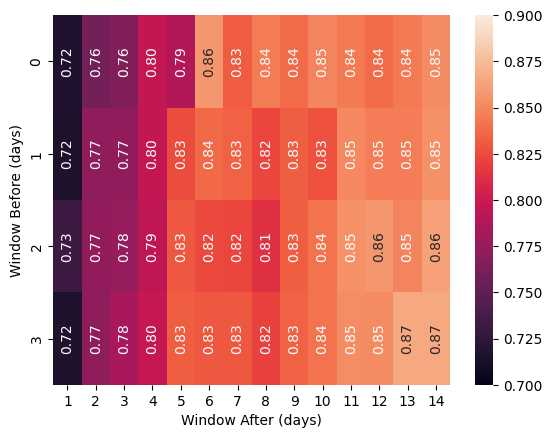

In [5]:
import seaborn as sns


s = sns.heatmap(
    plotDf,
    annot=True,
    fmt=".2f",
    vmin=0.7,
    vmax=0.9,
    yticklabels=['0', '1', '2', '3'],
    xticklabels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14'],
    color='#ffa69e',
    annot_kws={'rotation': 90},
)
s.set(xlabel='Window After (days)', ylabel='Window Before (days)')